# Capítulo 12: Tuplas

Uma observação: não há consenso sobre como pronunciar “tuple” (em inglês). Algumas pessoas dizem “tuhple”, que rima com “supple”. Porém, no contexto da programação, a maioria das pessoas diz “too-ple”, que rima com “quadruple”.

<h2> 12.1 - Tuplas são imutáveis </h2>

Uma tupla é uma sequência de valores. Os valores podem ser de qualquer tipo, e podem ser indexados por números inteiros, portanto, nesse sentido, as tuplas são muito parecidas com as listas. A diferença importante é que as tuplas são imutáveis.
Sintaticamente, uma tupla é uma lista de valores separados por vírgulas:

In [1]:
t = 'a', 'b', 'c', 'd', 'e'

Embora não seja sempre necessário, é comum colocar tuplas entre parênteses:

In [2]:
t = ('a', 'b', 'c', 'd', 'e')

Para criar uma tupla com um único elemento, é preciso incluir uma vírgula final:

In [3]:
t1 = 'a',
type(t1)

tuple

Um único valor entre parênteses não é uma tupla:

In [6]:
t2 = ('a')
type(t2)

str

Outra forma de criar uma tupla é com a função integrada tuple. Sem argumentos, cria uma tupla vazia:

In [7]:
t = tuple()
t

()

Se os argumentos forem uma sequência (string, lista ou tupla), o resultado é uma tupla com os elementos da sequência:

In [8]:
t = tuple('lupins')
t

('l', 'u', 'p', 'i', 'n', 's')

Como tuple é o nome de uma função integrada, você deve evitar usá-lo como nome de variável. A maior parte dos operadores de lista também funciona em tuplas. O operador de colchetes indexa um elemento:

In [9]:
t = ('a', 'b', 'c', 'd', 'e')
t[0]

'a'

E o operador de fatia seleciona vários elementos:

In [11]:
t[1:3]

('b', 'c')

Entretanto, se tentar alterar um dos elementos da tupla, vai receber um erro:

<code>
TypeError: object doesn't support item assignment
</code>

In [12]:
t[0] = 'A'

TypeError: 'tuple' object does not support item assignment

Como tuplas são imutáveis, você não pode alterar os elementos, mas pode substituir uma tupla por outra:

In [14]:
t = ('A',) + t[1:]
t

('A', 'b', 'c', 'd', 'e')

Essa instrução faz uma nova tupla e então a atribui a t.

Os operadores relacionais funcionam com tuplas e outras sequências; o Python começa comparando o primeiro elemento de cada sequência. Se forem iguais, vai para os próximos elementos, e assim por diante, até que encontre elementos que sejam diferentes. Os elementos subsequentes não são considerados (mesmo se forem muito grandes).


In [15]:
(0,1,2) < (0,3,4)

True

In [16]:
(0, 1, 2000000) < (0, 3, 4)

True

<h2> 12.2 - Atribuição de tuplas </h2>

Muitas vezes, é útil trocar os valores de duas variáveis. Com a atribuição convencional, é preciso usar uma variável temporária. Por exemplo, trocar a e b.

<code>
<p>temp = a</p>
<p>a = b</p>
<p>b = temp</p>
</code>

Essa solução é trabalhosa; a atribuição de tuplas é mais elegante:

<code>  a, b = b, a </code>

O lado esquerdo é uma tupla de variáveis; o lado direito é uma tupla de expressões. Cada valor é atribuído à sua respectiva variável. Todas as expressões no lado direito são avaliadas antes de todas as atribuições.

O número de variáveis à esquerda e o número de valores à direita precisam ser iguais:

<code> a, b = 1, 2, 3 </code>

<code> ValueError: too many values to unpack </code>

De forma geral, o lado direito pode ter qualquer tipo de sequência (string, lista ou tupla).
Por exemplo, para dividir um endereço de email em um nome de usuário e um domínio, você poderia escrever:


In [18]:
addr = 'monty@python.org'
uname, domain = addr.split('@')

In [19]:
uname

'monty'

In [20]:
domain

'python.org'

<h2> 12.3 - Tuplas como valores de retorno </h2>

Falando estritamente, uma função só pode retornar um valor, mas se o valor for uma tupla,
o efeito é o mesmo que retornar valores múltiplos. Por exemplo, se você quiser dividir
dois números inteiros e calcular o quociente e resto, não é eficiente calcular x/y e depois
x%y. É melhor calcular ambos ao mesmo tempo.
A função integrada divmod toma dois argumentos e devolve uma tupla de dois valores: o
quociente e o resto. Você pode guardar o resultado como uma tupla:

In [24]:
t = divmod(7, 3) # 7//3 = 2 
t

(2, 1)

Ou usar a atribuição de tuplas para guardar os elementos separadamente:

In [25]:
quot, rem = divmod(7, 3)

In [26]:
quot

2

In [27]:
rem

1

Aqui está um exemplo de função que retorna uma tupla:

In [28]:
def min_max(t):
    return min(t), max(t)

**max e min** são funções integradas que encontram os maiores e menores elementos de uma
sequência. min_max calcula ambos e retorna uma tupla de dois valores.

<h2> 12.4 - Tuplas com argumentos de comprimento variável </h2>

As funções podem receber um número variável de argumentos. Um nome de parâmetro
que comece com * reúne vários argumentos em uma tupla. Por exemplo, printall recebe
qualquer número de argumentos e os exibe:

In [29]:
def printall(*args):
    print(args)

O parâmetro com o prefixo * pode ter qualquer nome que você goste, mas args é o
convencional. É assim que a função funciona:

In [33]:
printall(1, 2.0, '3')


(1, 2.0, '3')


O complemento de reunir é espalhar. Se você tiver uma sequência de valores e quiser
passá-la a uma função como argumentos múltiplos, pode usar o operador *. Por exemplo,
o divmod recebe exatamente dois argumentos; ele não funciona com uma tupla:

<code> TypeError: divmod expected 2 arguments, got 1 </code>


In [34]:
t = (7, 3)
devidmod(t)

NameError: name 'devidmod' is not defined

No entanto, se você espalhar a tupla, aí funciona:

In [35]:
divmod(*t)

(2, 1)

Muitas das funções integradas usam tuplas com argumentos de comprimento variável. Por
exemplo, max e min podem receber qualquer número de argumentos:

In [36]:
max(1, 2, 3)

3

Mas sum, não:

<code>
TypeError: sum expected at most 2 arguments, got 3
</code>

In [37]:
sum(1, 2, 3)

TypeError: sum() takes at most 2 arguments (3 given)

<h2> Exercício </h2>

Como exercício, escreva uma função chamada sumall que receba qualquer número de
argumentos e retorne a soma deles.

In [44]:
def sumall(*args):
    soma = 0

    for i in args:
        soma += i
    
    return soma

t = (1,2,3,4)

sumall(t)

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

O erro ocorre porque você está passando a tupla t como um único argumento para a função sumall. Quando você faz isso, args será uma tupla contendo a tupla t como um único elemento, e, ao tentar somá-la com um número inteiro, o erro é gerado.

Para corrigir isso, você pode "desempacotar" a tupla quando a passar para a função, de forma que cada elemento da tupla seja passado individualmente como um argumento.

In [46]:
t = (1,2,3,4)

sumall(*t)

10

- O operador * na chamada da função sumall(*t) desempacota a tupla, ou seja, passa os elementos da tupla individualmente como argumentos para a função, em vez de passar a tupla inteira como um único argumento.

- Isso resolve o problema, pois a função agora vai receber os elementos da tupla como argumentos separados e somá-los corretamente.

<h2> 12.5 - Listas e tuplas </h2>

**zip** é uma função integrada que recebe duas ou mais sequências e devolve uma lista de
tuplas onde cada tupla contém um elemento de cada sequência. O nome da função tem a ver com o zíper, que se junta e encaixa duas carreiras de dentes.
Este exemplo encaixa uma string e uma lista:

In [47]:
s = 'abc'
t = [0,1,2]

zip(s,t)

O resultado é um objeto zip que sabe como percorrer os pares. O uso mais comum de zip
é em um loop for:

In [48]:
for pair in zip(s,t):
    print(pair)

('a', 0)
('b', 1)
('c', 2)


Um objeto zip é um tipo de iterador, ou seja, qualquer objeto que percorre ou itera sobre
uma sequência. Iteradores são semelhantes a listas em alguns aspectos, mas, ao contrário
de listas, não é possível usar um índice para selecionar um elemento de um iterador.
Se quiser usar operadores e métodos de lista, você pode usar um objeto zip para fazer uma
lista:

In [50]:
teste = list(zip(s,t))

In [54]:
ind = 0
for i in teste:
    print(ind, i)
    ind += 1

    for x in i:
        print(x)

0 ('a', 0)
a
0
1 ('b', 1)
b
1
2 ('c', 2)
c
2


O resultado é uma lista de tuplas; neste exemplo, cada tupla contém um caractere da string
e o elemento correspondente da lista.

Se as sequências não forem do mesmo comprimento, o resultado tem o comprimento da
mais curta:

In [55]:
list(zip('Anne', 'Elk'))

[('A', 'E'), ('n', 'l'), ('n', 'k')]

Você pode usar a atribuição de tuplas em um loop for para atravessar uma lista de tuplas:

In [56]:
t = [('a', 0), ('b', 1), ('c', 2)]

for letter, number in t:
    print(number, letter)

0 a
1 b
2 c


Cada vez que o programa passa pelo loop, o Python seleciona a próxima tupla na lista e
atribui os elementos letter e number. A saída deste loop é:

<code>
0 a
1 b
2 c
</code>

In [57]:
t = [('a', 0), ('b', 1), ('c', 2)]

for letter, number in t:
    print(letter, number)

a 0
b 1
c 2


Se combinar zip, for e atribuição de tuplas, você pode fazer uma expressão útil para
percorrer duas (ou mais) sequências ao mesmo tempo. Por exemplo, has_match recebe
duas sequências, t1 e t2 e retorna True se houver um índice i tal que t1[i] == t2[i]:

In [66]:
def has_match(t1, t2):
    for x, y in zip(t1, t2):
        if x == y:
            return True
    return False

In [67]:
t1 = [('a', 0), ('b', 1), ('c', 2), ('d', 3)]
t2 = [('a', 0), ('b', 1), ('c', 2), ('d', 3)]

has_match(t1, t2)

True

**Esse tipo de função é útil para comparar rapidamente duas sequências em paralelo.**

Se precisar atravessar os elementos de uma sequência e seus índices, você pode usar a
função integrada enumerate:

In [68]:
for index, element in enumerate('abc'):
    print(index, element)

0 a
1 b
2 c


O resultado de enumerate é um objeto enumerate, que itera sobre uma sequência de pares;
cada par contém um índice (começando de 0) e um elemento da sequência dada. Neste
exemplo, a saída é:

<code>
0 a<br>
1 b<br>
2 c<br>
</code>

<h2> 12.6 - Dicionários e tuplas </h2>

Os dicionários têm um método chamado items que devolve uma sequência de tuplas,
onde cada tupla é um par chave-valor:

In [69]:
d = {'a':0, 'b':1, 'c':2} # dicionário
t = d.items()
t

dict_items([('a', 0), ('b', 1), ('c', 2)])

O resultado é um objeto dict_items, que é um iterador que percorre os pares chave-valor.
Você pode usá-lo em um loop for, desta forma:

In [70]:
for key, value in d.items():
    print(key, value)

a 0
b 1
c 2


Como se poderia esperar de um dicionário, os itens não estão em nenhuma ordem em
particular.
Indo em outra direção, você pode usar uma lista de tuplas para inicializar um novo
dicionário:

In [71]:
t = [('a', 0), ('c', 2), ('b', 1)] # lista de tuplas
d = dict(t)
d

{'a': 0, 'c': 2, 'b': 1}

Combinar dict com zip produz uma forma concisa de criar um dicionário:

In [72]:
d = dict(zip('abc', range(3)))
d

{'a': 0, 'b': 1, 'c': 2}

O método de dicionário **update** também recebe uma lista de tuplas e as adiciona, como
pares chave-valor, a um dicionário existente.
É comum usar tuplas como chaves em dicionários (principalmente porque você não pode
usar listas). Por exemplo, uma lista telefônica poderia mapear pares de sobrenome e
primeiro nome a números de telefone. Supondo que tenhamos definido last, first e number,
podemos escrever:

<code> directory[last, first] = number </code>

A expressão entre chaves é uma tupla. Podemos usar atribuição de tuplas para atravessar
este dicionário:

<code>
for last, first in directory:<br>
&nbsp;&nbsp;&nbsp;print(first, last, directory[last,first])
</code>

Este loop atravessa as chaves em directory, que são tuplas. Ele atribui os elementos de
cada tupla para last e first, e então exibe o nome e número de telefone correspondente.

Há duas formas de representar tuplas em um diagrama de estado. A versão mais detalhada
mostra os índices e elementos como aparecem em uma lista. Por exemplo, a tupla
(‘Cleese’, ‘John’) apareceria como na Figura 12.1.

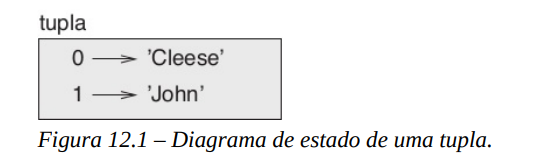

No entanto, em um diagrama maior, você pode querer omitir os detalhes. Por exemplo, um
diagrama da lista telefônica poderia ser como o da Figura 12.2.

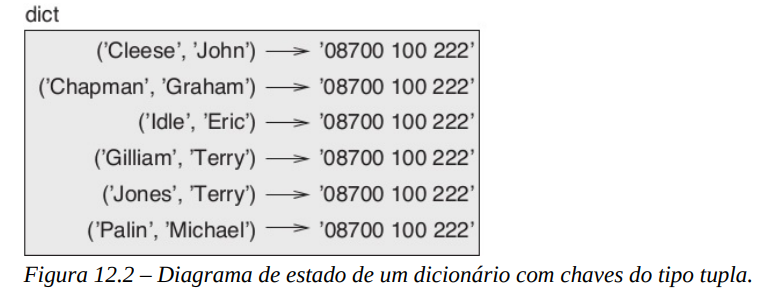

**Aqui as tuplas são mostradas usando a sintaxe do Python para simplificar o gráfico. O
número de telefone no diagrama é a linha de reclamações da BBC, então, por favor, não
ligue para lá.**

<h2> 12.7 - Sequências de sequências </h2>

Em muitos contextos, os tipos diferentes de sequências (strings, listas e tuplas) podem ser
usados de forma intercambiável. Então, como escolher uma em vez da outra?

Para começar com o óbvio, as strings são mais limitadas que outras sequências porque os
elementos têm de ser caracteres. Também são imutáveis. Se precisar da capacidade de
alterar caracteres em uma string (em vez de criar outra string) você pode querer usar uma
lista de caracteres.

As listas são mais comuns que as tuplas, principalmente porque são mutáveis. Mas há
alguns casos em que você pode preferir tuplas:

- 1. Em alguns contextos, como em uma instrução return, é sintaticamente mais simples
criar uma tupla que uma lista.

- 2. Se quiser usar uma sequência como uma chave de dicionário, é preciso usar um tipo
imutável como uma tupla ou string.

- 3. Se estiver passando uma sequência como um argumento a uma função, usar tuplas
reduz o potencial de comportamento inesperado devido a alias.

Como tuplas são imutáveis, elas não fornecem métodos como sort e reverse, que alteram
listas existentes. Porém, o Python fornece a função integrada sorted, que recebe qualquer
sequência e retorna uma nova lista com os mesmos elementos ordenados, e reversed, que
recebe uma sequência e retorna um iterador que percorre a lista em ordem reversa.


**As funções sorted() e reversed() são ferramentas úteis no Python para organizar e inverter sequências como listas, tuplas ou strings, sem modificar os objetos originais.**

**1. sorted()**

- O que faz?: Recebe uma sequência e retorna uma nova lista com os elementos ordenados.

- Imutabilidade: Não altera a sequência original.

Parâmetros importantes:
- reverse: Se for True, ordena em ordem decrescente.
- key: Permite personalizar a lógica de ordenação (ex.: ordenar por tamanho de string).
Exemplo com sorted():

In [1]:
tupla = (5, 3, 1, 4, 2)
lista_ordenada = sorted(tupla)  # Ordena em ordem crescente
print(lista_ordenada)
# Saída: [1, 2, 3, 4, 5]

lista_ordenada_decrescente = sorted(tupla, reverse=True)
print(lista_ordenada_decrescente)
# Saída: [5, 4, 3, 2, 1]

[1, 2, 3, 4, 5]
[5, 4, 3, 2, 1]


O parâmetro key da função sorted() permite que você defina uma função para determinar a ordem dos elementos. Essa função recebe cada item da sequência e retorna um valor que será usado para a comparação durante a ordenação.

In [2]:
palavras = ['banana', 'abacaxi', 'kiwi', 'manga']

# Ordenar pela quantidade de caracteres em cada palavra
lista_ordenada_por_tamanho = sorted(palavras, key=len)
print(lista_ordenada_por_tamanho)
# Saída: ['kiwi', 'manga', 'banana', 'abacaxi']

['kiwi', 'manga', 'banana', 'abacaxi']


Você também pode criar funções mais personalizadas para o parâmetro key. Veja um exemplo para ordenar uma lista de tuplas pelo segundo elemento de cada tupla:

In [3]:
tuplas = [(1, 5), (2, 1), (3, 3), (4, 2)]

# Ordenar pelo segundo elemento de cada tupla
lista_ordenada_por_segundo_elemento = sorted(tuplas, key=lambda x: x[1])
print(lista_ordenada_por_segundo_elemento)
# Saída: [(2, 1), (4, 2), (3, 3), (1, 5)]

[(2, 1), (4, 2), (3, 3), (1, 5)]


**2. reversed()**

- O que faz?: Recebe uma sequência e retorna um iterador que percorre a sequência em ordem inversa.
- Imutabilidade: Não altera a sequência original.

Importante: Como retorna um iterador, você precisa convertê-lo em uma lista ou outro tipo de sequência, se necessário.

In [4]:
tupla = (5, 3, 1, 4, 2)
tupla_reversa = list(reversed(tupla))  # Converte o iterador em uma lista reversa
print(tupla_reversa)
# Saída: [2, 4, 1, 3, 5]

[2, 4, 1, 3, 5]


Um iterador é um objeto em Python que permite percorrer uma sequência (como uma lista, tupla, ou string) um elemento de cada vez, sem precisar carregá-la inteira na memória. Ele "lembra" sua posição atual e vai avançando passo a passo.

Quando você chama a função reversed(), ela retorna um iterador, em vez de criar uma nova sequência. Isso economiza memória porque o Python não precisa armazenar a sequência invertida completa de uma vez, apenas produz os elementos conforme necessário.

Diferença entre iteradores e listas
Lista: É uma coleção de elementos que você pode acessar diretamente (usando índices, por exemplo), e ela já existe inteira na memória.
Iterador: Produz os elementos sob demanda, um por vez, e não permite acesso direto por índice.

**Como funciona um iterador**

Quando você usa um iterador, o Python fornece os elementos um a um, à medida que você os "pede". Você pode transformar o iterador em uma lista (ou outra sequência) se quiser acessar todos os elementos de uma vez.

Exemplo de reversed() com um iterador

In [7]:
lista = [1, 2, 3, 4]

# reversed retorna um iterador
iterador_reverso = reversed(lista)
print(iterador_reverso)  # Isso imprime que é um objeto iterador
# Saída: <list_reverseiterator object at 0x7f...>

# Podemos usar um loop for para percorrer o iterador
for elemento in iterador_reverso:
    print(elemento)
# Saída: 4 3 2 1

4
3
2
1


**Convertendo um iterador em lista**

Se você quiser converter um iterador (como o que reversed() retorna) em uma lista para acessar todos os elementos diretamente:

In [8]:
lista_invertida = list(reversed(lista))
print(lista_invertida)
# Saída: [4, 3, 2, 1]

[4, 3, 2, 1]


**Diferença prática**

- Lista: Toda a sequência já está disponível. Você pode acessar qualquer elemento diretamente, mas ocupa mais memória.

- Iterador: Só fornece um elemento por vez. Usa menos memória e é mais eficiente quando você precisa processar grandes quantidades de dados ou trabalhar com sequências muito longas.

Em resumo, o iterador é uma maneira mais eficiente de percorrer uma sequência, sem criar uma cópia completa dela.

<h2> 12.8 - Depuração </h2>

As listas, os dicionários e as tuplas são exemplos de estruturas de dados; neste capítulo
estamos começando a ver estruturas de dados compostas, como as listas de tuplas ou
dicionários que contêm tuplas como chaves e listas como valores. As estruturas de dados
compostas são úteis, mas são propensas ao que chamo de erros de forma; isto é, erros
causados quando uma estrutura de dados tem o tipo, tamanho ou estrutura incorretos. Por
exemplo, se você estiver esperando uma lista com um número inteiro e eu der apenas o
número inteiro (não em uma lista), não vai funcionar.

<h2> 12.9 - Glossário </h2>

- tupla: Sequência imutável de elementos.
- atribuição de tupla: Atribuição com uma sequência no lado direito e uma tupla de variáveis à esquerda. O
lado direito é avaliado e então seus elementos são atribuídos às variáveis à esquerda.
- gather: Operação para montar uma tupla com argumento de comprimento variável.
- scatter: Operação para tratar uma sequência como uma lista de argumentos.
- Objeto zip: O resultado de chamar uma função integrada zip; um objeto que se repete por uma
sequência de tuplas.
- iterador: Objeto que pode se repetir por uma sequência, mas que não oferece operadores de
lista e métodos.
- estrutura de dados: Coleção de valores relacionados, muitas vezes organizados em listas, dicionários,
tuplas etc.
- erro de forma: Erro causado pelo fato de o valor ter a forma incorreta; isto é, tipo ou tamanho
incorreto.

<h2> 12.10 - Exercícios </h2>

<h3> Exercício 12.1 </h3>

Escreva uma função chamada most_frequent que receba uma string e exiba as letras em
ordem decrescente de frequência. Encontre amostras de texto de vários idiomas diferentes
e veja como a frequência das letras varia entre os idiomas. Compare seus resultados com
as tabelas em http://en.wikipedia.org/wiki/Letter_frequencies.

**COMPARAÇÕES DE SOLUÇÕES: SOLUÇÃO PRÓPRIA:**

In [21]:
def chave_ordenacao(item):
    return item[1]


def most_frequent(string):
    tupla = tuple(string)
    letras_frequencia = {}
    letras_contadas = []
    count = 0

    for i in tupla:
        if i not in letras_contadas:
            letras_contadas.append(i)
            count = tupla.count(i)
            letras_frequencia[i] = count

            count = 0

     # ordenando o dicionário pelos valores em ordem decrescente
    letras_frequencia_ordenado = dict(sorted(letras_frequencia.items(), key=chave_ordenacao, reverse=True))

    return letras_frequencia_ordenado

In [22]:
most_frequent('ternaries')

{'e': 2, 'r': 2, 't': 1, 'n': 1, 'a': 1, 'i': 1, 's': 1}

**SOLUÇÃO CHATGPT:**

In [23]:
def most_frequent_gpt(string):
    # Converte a string para minúsculas e remove espaços
    string = string.lower().replace(" ", "")
    
    letras_frequencia = {}
    
    # Contagem das frequências
    for letra in string:
        if letra.isalpha():  # Verifica se é uma letra
            letras_frequencia[letra] = letras_frequencia.get(letra, 0) + 1

    # Ordena as letras com base na frequência em ordem decrescente
    letras_ordenadas = sorted(letras_frequencia.items(), key=lambda item: item[1], reverse=True)

    # Exibe as letras em ordem de frequência
    for letra, frequencia in letras_ordenadas:
        print(f"{letra}: {frequencia}")


In [24]:
# Texto em inglês
texto_ingles = "The quick brown fox jumps over the lazy dog."
print("Inglês:")
most_frequent_gpt(texto_ingles)

# Texto em espanhol
texto_espanhol = "El zorro marrón rápido salta sobre el perro perezoso."
print("\nEspanhol:")
most_frequent_gpt(texto_espanhol)

# Texto em francês
texto_frances = "Le renard brun rapide saute par-dessus le chien paresseux."
print("\nFrancês:")
most_frequent_gpt(texto_frances)


Inglês:
o: 4
e: 3
t: 2
h: 2
u: 2
r: 2
q: 1
i: 1
c: 1
k: 1
b: 1
w: 1
n: 1
f: 1
x: 1
j: 1
m: 1
p: 1
s: 1
v: 1
l: 1
a: 1
z: 1
y: 1
d: 1
g: 1

Espanhol:
r: 9
o: 7
e: 6
l: 3
a: 3
p: 3
s: 3
z: 2
m: 1
ó: 1
n: 1
á: 1
i: 1
d: 1
t: 1
b: 1

Francês:
e: 9
r: 6
s: 6
a: 5
u: 4
n: 3
d: 3
p: 3
l: 2
i: 2
b: 1
t: 1
c: 1
h: 1
x: 1


<h3> Exercício 12.2 </h3>

Mais anagramas!
1. Escreva um programa que leia uma lista de palavras de um arquivo (veja “Leitura de
listas de palavras”, na página 133) e imprima todos os conjuntos de palavras que são
anagramas.
Aqui está um exemplo de como a saída pode parecer:
['deltas', 'desalt', 'lasted', 'salted', 'slated', 'staled']
['retainers', 'ternaries']
['generating', 'greatening']
['resmelts', 'smelters', 'termless']

Dica: você pode querer construir um dicionário que mapeie uma coleção de letras a
uma lista de palavras que podem ser soletradas com essas letras. A pergunta é: como
representar a coleção de letras de forma que possa ser usada como uma chave?


In [37]:
from collections import Counter

def is_anagram(word1, word2):
    return Counter(word1) == Counter(word2)

In [3]:
# declarações de variáveis e listas
arquivo = open('words.txt')

lista_de_palavras = []
dicionario_anagramas = {}

for i in arquivo:
    palavra = i.strip().lower()

    # criação da chave para os respectivos valores no dicionário
    chave = ''.join(sorted(palavra))

    # se a chave já existe no dicionário:
    if chave in dicionario_anagramas:
        # nesta chave existente, vai adicionar a palavra atual à lista de valores
        dicionario_anagramas[chave].append(palavra)
    # se não, se é a primeira vez que encontramos uma palavra com essa combinação de letras
    # e aí precisamos criar uma nova entrada no dicionário para essa chave e respectivo valor
    else:
         dicionario_anagramas[chave] = [palavra]
  
for k, v in zip(dicionario_anagramas.keys(), dicionario_anagramas.values()):
    if len(v) > 1:
        print(k,':', v)

aah : ['aah', 'aha']
aadeh : ['aahed', 'ahead']
aal : ['aal', 'ala']
aals : ['aals', 'alas']
aab : ['aba', 'baa']
aaabcs : ['abacas', 'casaba']
aabs : ['abas', 'baas']
aabeemnst : ['abasement', 'entamebas']
aabgins : ['abasing', 'bisnaga']
aaberst : ['abaters', 'abreast']
aabort : ['abator', 'rabato']
aaborst : ['abators', 'rabatos']
abbe : ['abbe', 'babe']
abbes : ['abbes', 'babes']
aabem : ['abeam', 'ameba']
abde : ['abed', 'bade', 'bead']
abeklmos : ['abelmosk', 'smokable']
abet : ['abet', 'bate', 'beat', 'beta']
abest : ['abets', 'baste', 'bates', 'beast', 'beats', 'betas', 'tabes']
aabelstt : ['abettals', 'statable', 'tastable']
abeertt : ['abetter', 'beretta']
abeerstt : ['abetters', 'berettas']
abeortt : ['abettor', 'taboret']
abeorstt : ['abettors', 'taborets']
abdehorr : ['abhorred', 'harbored']
abehorrr : ['abhorrer', 'harborer']
abehorrrs : ['abhorrers', 'harborers']
abghinorr : ['abhorring', 'harboring']
abdei : ['abide', 'abied']
abddei : ['abided', 'baddie']
abdeirs : ['a

2. Altere o programa anterior para que exiba a lista mais longa de anagramas primeiro,
seguido pela segunda mais longa, e assim por diante.

In [15]:
from pprint import pprint

In [1]:
# função que retorna o comprimento do valor que consta naquela chave
def obter_tamanho_valor(item):
    return len(item[1])

In [11]:
def conjuntosAnagramas(arquivo):
    dicionario_anagramas = {}

    for i in arquivo:
        palavra = i.strip().lower()

        # criação da chave para os respectivos valores no dicionário
        chave = ''.join(sorted(palavra))

        # se a chave já existe no dicionário:
        if chave in dicionario_anagramas:
            # nesta chave existente, vai adicionar a palavra atual à lista de valores
            dicionario_anagramas[chave].append(palavra)
        # se não, se é a primeira vez que encontramos uma palavra com essa combinação de letras
        # e aí precisamos criar uma nova entrada no dicionário para essa chave e respectivo valor
        else:
            dicionario_anagramas[chave] = [palavra]
    
    # a função sorted 
    dicionario_ordenado = dict(sorted(dicionario_anagramas.items(), key=obter_tamanho_valor, reverse=True))
    
    return dicionario_ordenado
    

In [19]:
# declarações
arquivo = open('words.txt')

In [20]:
conjuntosAnagramas(arquivo)

{'aelrst': ['alerts',
  'alters',
  'artels',
  'estral',
  'laster',
  'ratels',
  'salter',
  'slater',
  'staler',
  'stelar',
  'talers'],
 'aeprs': ['apers',
  'asper',
  'pares',
  'parse',
  'pears',
  'prase',
  'presa',
  'rapes',
  'reaps',
  'spare',
  'spear'],
 'aelst': ['least',
  'setal',
  'slate',
  'stale',
  'steal',
  'stela',
  'taels',
  'tales',
  'teals',
  'tesla'],
 'aceprs': ['capers',
  'crapes',
  'escarp',
  'pacers',
  'parsec',
  'recaps',
  'scrape',
  'secpar',
  'spacer'],
 'einrst': ['estrin',
  'inerts',
  'insert',
  'inters',
  'niters',
  'nitres',
  'sinter',
  'triens',
  'trines'],
 'acers': ['acers',
  'acres',
  'cares',
  'carse',
  'escar',
  'races',
  'scare',
  'serac'],
 'aeinrst': ['anestri',
  'nastier',
  'ratines',
  'retains',
  'retinas',
  'retsina',
  'stainer',
  'stearin'],
 'aelrs': ['arles',
  'earls',
  'lares',
  'laser',
  'lears',
  'rales',
  'reals',
  'seral'],
 'aeprss': ['aspers',
  'parses',
  'passer',
  'prases'

3. No Scrabble, um “bingo” é quando você joga todas as sete peças na sua estante, junto
com uma peça no tabuleiro, para formar uma palavra de oito letras. Que coleção de
oito letras forma o maior número possível de bingos? Dica: há sete.

In [65]:
# função que retorna o comprimento do valor que consta naquela chave
def obter_tamanho_valor_8(item):
    if len(item[1]) == 8:
        return len(item[1])

In [82]:
def scrabble(arquivo):
    dicionario_anagramas = {}

    for i in arquivo:
        palavra = i.strip().lower()

        if len(palavra) == 8:
            # criação da chave para os respectivos valores no dicionário
            chave = ''.join(sorted(palavra))
                
            # se a chave já existe no dicionário:
            if chave in dicionario_anagramas:
                # nesta chave existente, vai adicionar a palavra atual à lista de valores
                dicionario_anagramas[chave].append(palavra)
                    
                # se não, se é a primeira vez que encontramos uma palavra com essa combinação de letras
                # e aí precisamos criar uma nova entrada no dicionário para essa chave e respectivo valor
            else:
                dicionario_anagramas[chave] = [palavra]
        
    
    dicionario_ordenado = dict(sorted(dicionario_anagramas.items(), key=obter_tamanho_valor, reverse=True))
    dicionario_ordenado_de_8 = {}

    for k, v in zip(dicionario_ordenado.keys(), dicionario_ordenado.values()):
        dicionario_ordenado_de_8[k] = v

        if len(dicionario_ordenado_de_8) == 7:
            break

    return dicionario_ordenado_de_8

In [83]:
# declarações
arquivo = open('words.txt')

In [84]:
scrabble(arquivo)

{'aeginrst': ['angriest',
  'astringe',
  'ganister',
  'gantries',
  'granites',
  'ingrates',
  'rangiest'],
 'aegilnrt': ['alerting',
  'altering',
  'integral',
  'relating',
  'tanglier',
  'triangle'],
 'aegilnrs': ['aligners',
  'engrails',
  'nargiles',
  'realigns',
  'signaler',
  'slangier'],
 'aeegnrst': ['estrange',
  'grantees',
  'greatens',
  'negaters',
  'reagents',
  'sergeant'],
 'aeinprst': ['painters',
  'pantries',
  'pertains',
  'pinaster',
  'pristane',
  'repaints'],
 'acinnost': ['actinons', 'canonist', 'contains', 'sanction', 'sonantic'],
 'aeilmnst': ['ailments', 'aliments', 'manliest', 'melanist', 'smaltine']}

<h3> Exercício 12.3 </h3>

Duas palavras formam um “par de metátese” se você puder transformar uma na outra
trocando duas letras, por exemplo, “converse” e “conserve”. Escreva um programa que
descubra todos os pares de metátese no dicionário. Dica: não teste todos os pares de
palavras e não teste todas as trocas possíveis.

Crédito: este exercício foi inspirado
por um exemplo em http://puzzlers.org.


<h3> Exercício 12.4 </h3>

Aqui está outro quebra-cabeça do programa Car Talk
(http://www.cartalk.com/content/puzzlers):
Qual é a palavra inglesa mais longa, que permanece uma palavra inglesa válida, conforme
vai removendo suas letras, uma após a outra?
Agora, as letras podem ser retiradas do fim ou do meio, mas você não pode reajustar
nenhuma delas. Cada vez que remove uma letra, você acaba com outra palavra inglesa. Se
fizer isto, eventualmente você acabará com uma letra e isso também será uma palavra
inglesa; uma encontrada no dicionário. Quero saber qual é a palavra mais longa e quantas
letras tem?
Vou dar um pequeno exemplo modesto: Sprite. Ok? Você começa com sprite, tira uma
letra do interior da palavra, tira o r, e ficamos com a palavra spite, então tiramos o e do
fim, ficamos com spit, tiramos o s, ficamos com pit, it e I.
Escreva um programa que encontre todas as palavras que podem ser reduzidas desta
forma, e então encontre a mais longa.
Este exercício é um pouco mais desafiador que a maioria, então aqui estão algumas
sugestões:
1. Você pode querer escrever uma função que receba uma palavra e calcule uma lista de
todas as palavras que podem ser formadas retirando uma letra. Esses são os “filhos”
da palavra.
2. Recursivamente, uma palavra é redutível se algum de seus filhos for redutível. Como
caso base, você pode considerar a string vazia redutível.
3. A lista de palavras que forneci, words.txt, não contém palavras de uma letra só.
Portanto, você pode querer acrescentar “I”, “a”, e a string vazia.
4. Para melhorar o desempenho do seu programa, você pode querer memorizar as
palavras conhecidas por serem redutíveis.
